In [ ]:
import pandas as pd
import geopandas as gpd

link="https://github.com/chorrillos/preprocesamiento/raw/main/datadismap.gpkg"
datadismap = gpd.read_file(link, layer='DISTRITO')

import mapclassify 
import numpy
numpy.random.seed(12345)

K=5
# mismo ancho interval, posible pocos conteos, interpretacion facil
ei5 = mapclassify.EqualInterval(datadismap['IDH2019'], k=K)
# mismo ancho interval basado en SDs, interpretacion algo facil, inapropiado para valores muy sesgados
msd = mapclassify.StdMean(datadismap['IDH2019'])
# diff ancho interval, conteo similar, interpretacion dificil, repetidos complica cortes                                
q5=mapclassify.Quantiles(datadismap['IDH2019'],k=K)
# diff intervalo basado en similaridad, apropiado para data multimodal
mb5 = mapclassify.MaximumBreaks(datadismap['IDH2019'], k=K)
# diff intervalo basado en similaridad, apropiado para muy sesgada
ht = mapclassify.HeadTailBreaks(datadismap['IDH2019']) 
# diff intervalo basado en similaridad, heuristico
fj5 = mapclassify.FisherJenks(datadismap['IDH2019'], k=K)
# diff intervalo basado en similaridad, optimizador
jc5 = mapclassify.JenksCaspall(datadismap['IDH2019'], k=K)
# diff intervalo basado en similaridad, heuristico
mp5 = mapclassify.MaxP(datadismap['IDH2019'], k=K)   




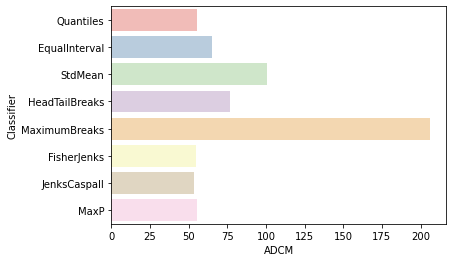

In [2]:
import seaborn
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = numpy.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']
ax = seaborn.barplot(
    y='Classifier', x='ADCM', data=adcms, palette='Pastel1'
)

In [3]:
datadismap['Quantiles'] = q5.yb 
datadismap['Equal Interval'] = ei5.yb 
datadismap['Fisher-Jenks'] = fj5.yb
datadismap['Jenks Caspall'] = jc5.yb
datadismap['MaxP'] = mp5.yb

In [8]:
datadismap.columns

Index(['DEPARTAMEN', 'PROVINCIA', 'DISTRITO', 'INSTITUCIO', 'Poblacion',
       'Superficie', 'Den_pob', 'RENIEC', 'POB-PEN', 'ES_PRIV', 'ES_PUB',
       'N_COMIS', 'IIEE_PROG_PUB020', 'IIEE_PROG_PRIV2020', 'Latitud',
       'Longitud', 'Ejec_reduc_delit', 'Increm_reduc_delit', 'IDH2019',
       'Educ_sec_comp2019_pct', 'NBI2017_pct',
       'niños_no_asisten_escuela2017_pct', 'Viv_sin_serv_hig2017_pct',
       'pob_inf2018', 'pob_supf2018', 'pct_local_no_cobertura_cell',
       'pct_local_cobertura_cell', 'ZG', 'Delitos', 'TID', 'Delitos_todos',
       'geometry', 'Quantiles', 'Equal Interval', 'Fisher-Jenks',
       'Jenks Caspall', 'MaxP'],
      dtype='object')

In [4]:
clasifIDH=datadismap.loc[:,['DISTRITO','IDH2019','Quantiles', 'Equal Interval',
                            'Fisher-Jenks', 'Jenks Caspall', 'MaxP','ZG']].copy()

clasifIDH.sort_values('IDH2019',inplace=True)
clasifIDH=clasifIDH.drop('IDH2019',axis=1).set_index('DISTRITO')

clasifIDH_ZG=clasifIDH[clasifIDH.ZG=='ZG']
clasifIDH_ZG=clasifIDH_ZG.drop("ZG",axis=1)

TheCounts={x:clasifIDH_ZG[x].value_counts(sort=False,dropna=False).to_list() for x in clasifIDH_ZG.columns}
pd.DataFrame({key:pd.Series(value) for key, value in TheCounts.items()})

,Quantiles,Equal Interval,Fisher-Jenks,Jenks Caspall,MaxP
0,11,5.0,9,9,11
1,17,41.0,33,21,17
2,23,20.0,21,26,23
3,15,11.0,11,15,15
4,11,NaN,3,6,11


In [6]:
class5new = q5, ei5, fj5, jc5, mp5
pd.DataFrame(
    {c.name: c.counts for c in class5new},
    index=['Class-{}'.format(i) for i in range(5)]
)

,Quantiles,EqualInterval,FisherJenks,JenksCaspall,MaxP
Class-0,375,180,351,352,370
Class-1,375,789,584,484,380
Class-2,374,549,424,403,371
Class-3,375,301,330,351,381
Class-4,375,55,185,284,372


<AxesSubplot:xlabel='IDH2019', ylabel='Count'>

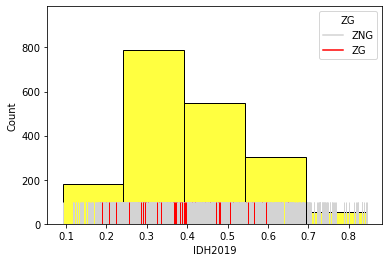

In [80]:
ax = seaborn.histplot(datadismap['IDH2019'], bins=5,color='yellow')
# Add rug on horizontal axis
seaborn.rugplot(
    data=datadismap,x='IDH2019', height=0.1, hue="ZG", ax=ax,palette=['lightgrey','red']
)

In [51]:
ei5full=list(ei5.bins)
ei5full.insert(0, datadismap.IDH2019.min())

<AxesSubplot:xlabel='IDH2019', ylabel='Count'>

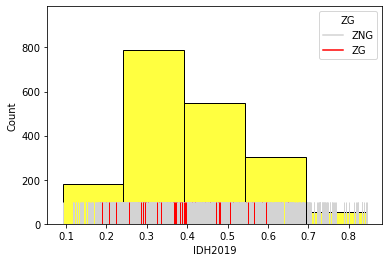

In [79]:
ax=seaborn.histplot(datadismap, x="IDH2019", bins=ei5full,color='yellow')
seaborn.rugplot(
    data=datadismap,x='IDH2019', height=0.1, hue="ZG", ax=ax,palette=['lightgrey','red']
)

<AxesSubplot:xlabel='IDH2019', ylabel='Count'>

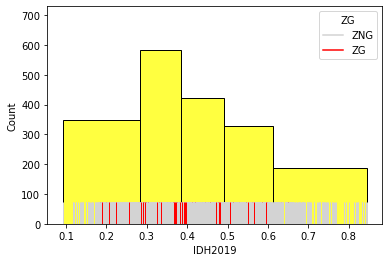

In [81]:
fj5full=list(fj5.bins)
fj5full.insert(0, datadismap.IDH2019.min())
ax=seaborn.histplot(datadismap, x="IDH2019", bins=fj5full,color="yellow")
seaborn.rugplot(
    data=datadismap,x='IDH2019', height=0.1, hue="ZG", ax=ax,palette=['lightgrey','red']
)

<AxesSubplot:xlabel='IDH2019', ylabel='Count'>

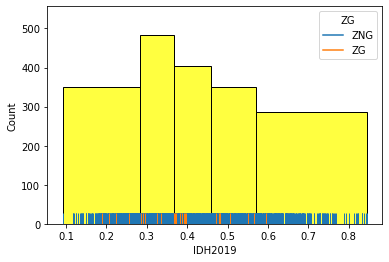

In [70]:
jc5full=list(jc5.bins)
jc5full.insert(0, datadismap.IDH2019.min())
ax=seaborn.histplot(datadismap, x="IDH2019",bins=jc5full,color="yellow")
seaborn.rugplot(
    data=datadismap,x='IDH2019', height=0.05, hue="ZG", ax=ax
)

In [73]:
clasifIDH=datadismap.loc[:,['DEPARTAMEN', 'PROVINCIA', 'DISTRITO', 'Equal Interval',
                            'Fisher-Jenks', 'Jenks Caspall', 'ZG','geometry']].copy()

In [ ]:
datadismap.to_file("datadismap.gpkg", layer='DISTRITO', driver="GPKG")